In [1]:
# -----------------------------------------------------------#
# Jupyter notebook for plotting transfer functions in s-space
# and relating this to the frequency response.
# ZEIT3216: Design of Electronic Circuits 3
# tkb 2020
# -----------------------------------------------------------#


 So, let's say you have a transfer function, and you want to plot its magnitude in s-space.  Given that the magnitude of a complex number is $\sqrt{\mathbb{R}^2+\mathbb{I}^2}$ (Pythagoras in the complex plane: remember those phasor things?), and that the transfer function is just a bunch of complex numbers as a function of frequency, $$|H(s)|=\sqrt{\mathbb{R}_{H(s)}^2+\mathbb{I}_{H(s)}^2}$$

A generic second order low pass filter (with unity gain in the passband) has a transfer function given by:
$$
H(s)=\frac{\omega_0^2}{s^2+2\zeta\omega_0s+\omega_0^2}
$$
Where $\zeta$ is the damping and varies between 0-1

A generic second order high pass filter (with unity gain in the passband) has a transfer function given by:
$$
H(s)=\frac{s^2}{s^2+2\zeta\omega_0s+\omega_0^2}
$$
Where $\zeta$ is the damping and varies between 0-1

A generic second order band pass filter (with unity gain in the passband) has a transfer function given by:
\begin{align}
H(s)=\frac{2\zeta\omega_0s}{s^2+2\zeta\omega_0s+\omega_0^2}
\end{align}
Where $\zeta$ is the damping and varies between 0-1

The below code plots the surface in s-space for the transfer function as a function of $\zeta$ and $\omega_0$.  

The data are plotted by splitting $s$ into real and imaginary parts:
$$s=x+jy$$
This is then plotted as a surface in the complex plane, with the $x$ and $y$ axes defined as above.  The $z$-axis is the magnitude.  The red line is on the plane defined by the complex axis: this is the frequency response.

[Text(0,0,'0.1'), Text(0,0,'1'), Text(0,0,'10')]

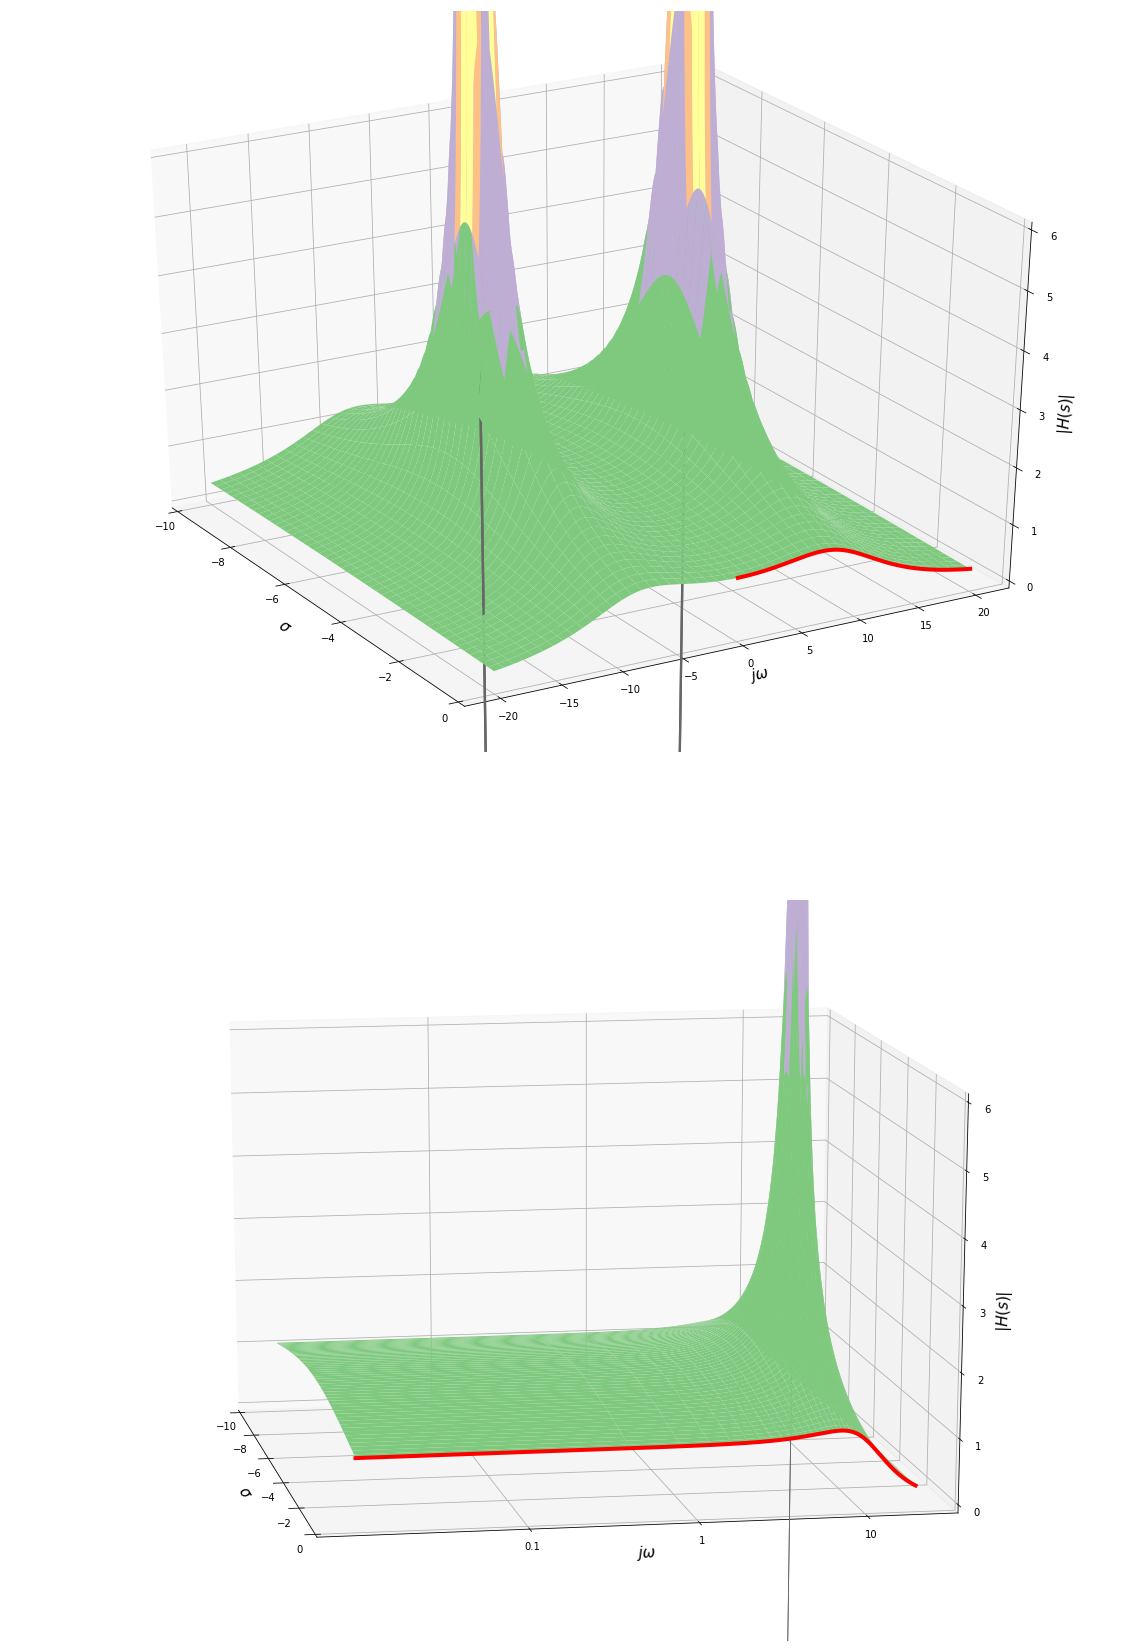

In [2]:
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = (20.0, 30.0)
#############################################################################
# Don't do this.  I'm using it to suppress a divide by zero warning that
# isn't real.
import warnings
warnings.filterwarnings('ignore')
#############################################################################

x=np.linspace(-10,0,2000)
y=np.linspace(-20,20,2000)
xv,yv=np.meshgrid(x,y)
xv_line=np.array([0])
y_line=np.linspace(0,20,2000)
ypos=np.linspace(0,20,2000)
xp,yp=np.meshgrid(x,ypos)

# ############################################################################
# USER INPUT #
# Choose the type of filter: lowpass, highpass, bandpass, bandstop

plot_type=('lowpass')

#Choose the corner frequency and the damping:

omega_0=10 #Less than 20 unless you want to change the plot axes
zeta=.5#Between 0-1.  0.707 is critically damped

# ############################################################################

# Re-write the transfer functions as s=Re+Im then break into real and imaginary 
# parts.

def TransferFunctionPlottable(xv,yv):
    # High pass
    if plot_type =='highpass':
        return (xv**2+yv**2)/(np.sqrt((xv**2-yv**2+2*zeta*omega_0*xv+omega_0**2)**2
                                 +(2*xv*yv+2*zeta*omega_0*yv)**2))
    # Low pass
    elif plot_type =='lowpass':
        return omega_0**2/(np.sqrt((xv**2-yv**2+2*zeta*omega_0*xv+omega_0**2)**2
                                 +(2*xv*yv+2*zeta*omega_0*yv)**2))
    
    elif plot_type =='bandpass':
        return (2*zeta*omega_0*np.sqrt(xv**2+yv**2))/(np.sqrt((xv**2-yv**2+2*zeta*omega_0*xv+omega_0**2)**2
                                                       +(2*xv*yv+2*zeta*omega_0*yv)**2))
    
    elif plot_type =='bandstop':
        return ((omega_0**2)+(xv**2+yv**2))/(np.sqrt((xv**2-yv**2+2*zeta*omega_0*xv+omega_0**2)**2
                                                       +(2*xv*yv+2*zeta*omega_0*yv)**2))

# ##############################################################################    
  
F2=TransferFunctionPlottable(xv,yv)
z=TransferFunctionPlottable(xv_line,y_line)
zp=TransferFunctionPlottable(xp,yp)

# ##############################################################################    

fig = plt.figure()
#Plot the surface


# ##############################################################################    

# Plot the surface with a different viewing angle
ax = fig.add_subplot(211, projection='3d')
ax.plot_surface(xv, yv, F2, cmap='Accent')
ax.view_init(elev=30,azim=-30)
ax.set_xlim(-10, 0)
ax.set_zlim(0, 6)
ax.set_xlabel('$\sigma$',fontsize=15)
ax.set_ylabel('$j\omega$',fontsize=15)
ax.set_zlabel('$|H(s)|$',fontsize=15)
#Plot the line along the complex axis.
ax.plot(xv_line * np.ones(y.size), y_line, z,'r',linewidth=4)


ax = fig.add_subplot(212, projection='3d')
ax.plot_surface(xp, np.log10(yp), zp, cmap='Accent')
ax.view_init(elev=15,azim=-10)
ax.set_xlim(-10, 0)
ax.set_zlim(0, 6)
ax.set_xlabel('$\sigma$',fontsize=15)
ax.set_ylabel('$j\omega$',fontsize=15)
# ax.yaxis.set_scale('log')
ax.set_zlabel('$|H(s)|$',fontsize=15)
# Plot the line along the complex axis
ax.plot(xv_line * np.ones(y.size), np.log10(y_line), z,'r',linewidth=4)
yticks = [ 10**-1, 10**0,  10**1]
ax.set_yticks(np.log10(yticks))
ax.set_yticklabels(yticks)